In [2]:
#dependancies 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

In [3]:
# Reading the csv file into a pandas DataFrame

csvdata = pd.read_csv('Resources/water_potability.csv')
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Statistical summary 
csvdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369481,32.879680,47.430000,176.847500,196.965000,216.670000,323.120000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

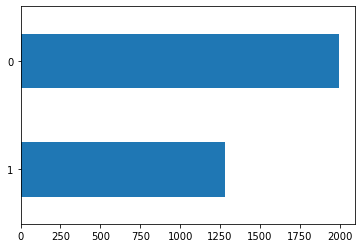

In [5]:
#Potability data

csvdata.Potability.value_counts().sort_values().plot(kind = 'barh')

In [6]:
data = csvdata.isnull().sum()
data

Ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data2 = csvdata.fillna(csvdata.mean())
data2

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.89,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.42,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.24,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.68,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.55,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.76,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.60,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
X = data2.drop(['Potability'], axis=1)
y = data2['Potability']
print(X.shape, y.shape)

(3276, 9) (3276,)


In [10]:
# Splitting the dataset into training and test set. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [11]:
from sklearn.preprocessing import StandardScaler

# the Standard Scaler
scaler = StandardScaler()

# Fit the scaler to the training set
scaler.fit(X_train)

# Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)

In [12]:
# the Algorithm 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Predict on test 
lr_pred = classifier.predict(X_test_scaled)

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report 
print("R2 Score:",r2_score(y_test, lr_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test, lr_pred))
print("Accuracy:",accuracy_score(y_test, lr_pred)*100) 
print("Confusion Matrix:\n",confusion_matrix(y_test, lr_pred))
print("Classification Report:\n",classification_report(y_test, lr_pred)) 

R2 Score: -0.5753046562839406
Mean Squared Error: 0.3673780487804878
Accuracy: 63.262195121951216
Confusion Matrix:
 [[413   0]
 [241   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       413
           1       1.00      0.01      0.02       243

    accuracy                           0.63       656
   macro avg       0.82      0.50      0.40       656
weighted avg       0.77      0.63      0.49       656



In [14]:
predictions = classifier.predict(X_test)
print(f"First 20 Predictions:   {predictions[:30]}")
print(f"First 20 Actual labels: {y_test[:30].tolist()}")

First 20 Predictions:   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
First 20 Actual labels: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]


In [15]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,0
1,1,1
2,1,0
3,1,0
4,1,1
...,...,...
651,1,0
652,1,1
653,1,0
654,1,0


In [16]:
# Get performance metrics
from sklearn import metrics
logreg_score = metrics.accuracy_score(y_test, lr_pred) * 100
logreg_score

63.262195121951216

In [17]:
# Save the model as "Waterquality.pkl"

pickle.dump(classifier, open('Water_Q.pkl','wb'))